# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set_theme(style='darkgrid')

In [7]:
df = pd.read_csv('autos.csv')

In [8]:
df.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
df.shape

(241190, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


In [11]:
df.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

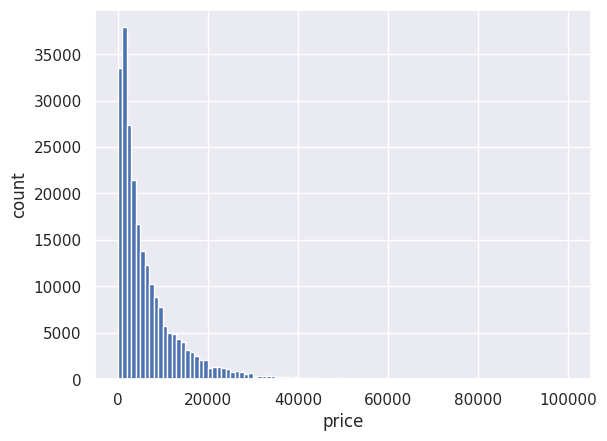

In [12]:
plt.hist(df["price"], bins=100)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

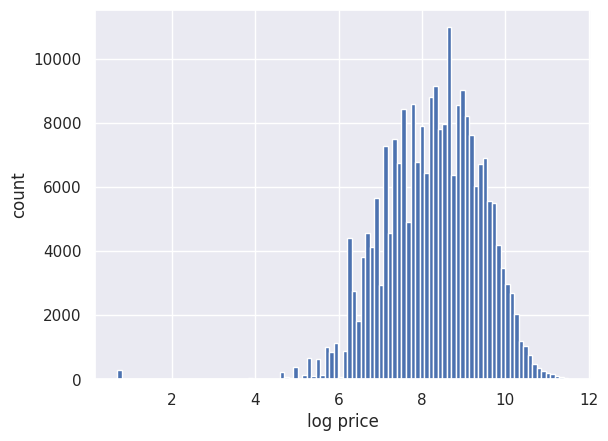

In [13]:
plt.hist(np.log1p(df["price"]), bins=100)
plt.xlabel('log price')
plt.ylabel('count')
plt.show()

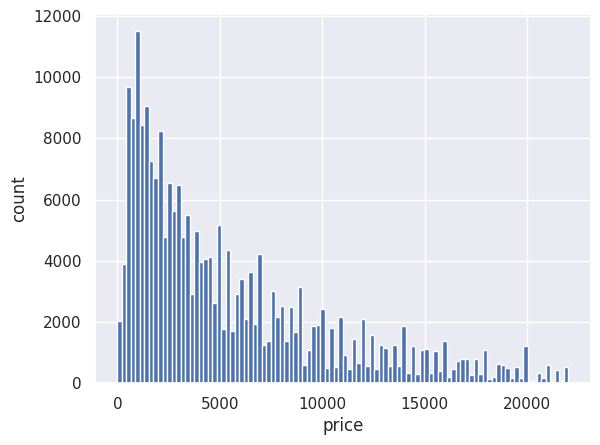

In [14]:
plt.hist(df.loc[(df["price"] < df["price"].quantile(0.95)), "price"], bins=100)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

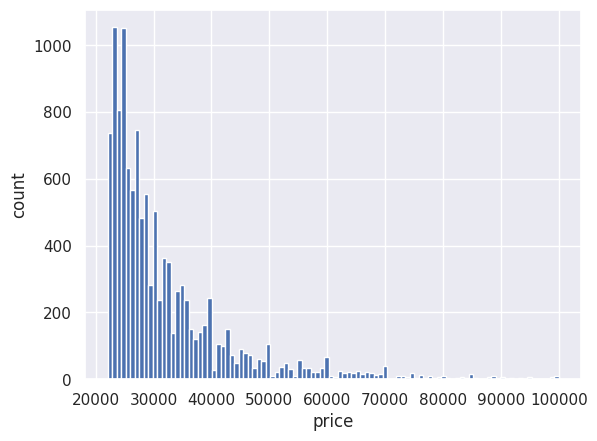

In [15]:
plt.hist(df.loc[(df["price"] > df["price"].quantile(0.95)), "price"], bins=100)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [16]:
df["log_price"] = np.log1p(df["price"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              241190 non-null  object 
 1   model              241190 non-null  object 
 2   vehicleType        241190 non-null  object 
 3   gearbox            241190 non-null  object 
 4   fuelType           241190 non-null  object 
 5   notRepairedDamage  241190 non-null  object 
 6   powerPS            241190 non-null  int64  
 7   kilometer          241190 non-null  int64  
 8   autoAgeMonths      241190 non-null  int64  
 9   price              241190 non-null  int64  
 10  log_price          241190 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ MB


<Axes: ylabel='price'>

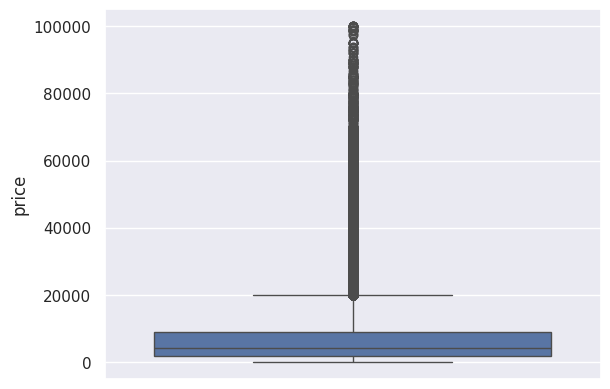

In [18]:
sns.boxplot(y='price', data=df)

<Axes: ylabel='log_price'>

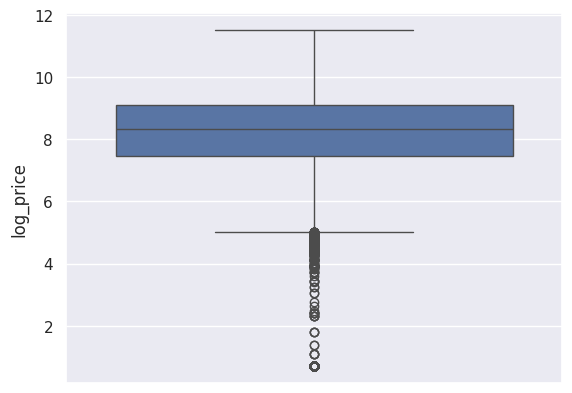

In [19]:
sns.boxplot(y='log_price', data=df)

In [20]:
np.expm1(5)

147.4131591025766

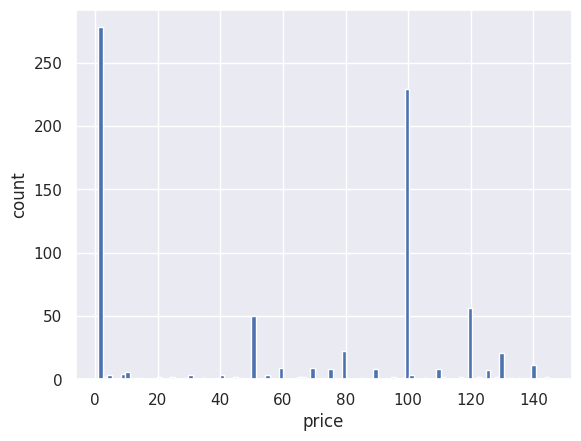

In [21]:
outliers = df.loc[(df["log_price"] < 5), "price"]
plt.hist(outliers, bins=100)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [22]:
outliers.shape

(779,)

In [23]:
df.describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,241190.000000,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892,8.265938
std,60.622613,39825.955933,73.092598,8024.451993,1.152901
min,51.000000,5000.000000,1.000000,1.000000,0.693147
25%,90.000000,100000.000000,92.000000,1750.000000,7.467942
50%,120.000000,150000.000000,140.000000,4100.000000,8.318986
75%,160.000000,150000.000000,192.000000,8999.000000,9.104980
max,589.000000,150000.000000,600.000000,99999.000000,11.512925


In [24]:
df.loc[(df["log_price"] > 5)].describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,240411.000000,240411.000000,240411.000000,240411.000000,240411.000000
mean,131.382312,123729.945801,144.544480,6909.866799,8.282659
std,60.628496,39830.846479,73.028833,8028.007837,1.111713
min,51.000000,5000.000000,1.000000,149.000000,5.010635
25%,90.000000,100000.000000,92.000000,1799.000000,7.495542
50%,120.000000,150000.000000,140.000000,4190.000000,8.340695
75%,160.000000,150000.000000,192.000000,8999.000000,9.104980
max,589.000000,150000.000000,600.000000,99999.000000,11.512925


In [25]:
df.loc[(df["price"] < 20000)].describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,226440.000000,226440.000000,226440.000000,226440.000000,226440.000000
mean,124.934093,127150.172231,149.917205,5367.455423,8.135750
std,52.640117,36958.464247,69.794152,4717.446779,1.064294
min,51.000000,5000.000000,1.000000,1.000000,0.693147
25%,86.000000,125000.000000,100.000000,1650.000000,7.409136
50%,116.000000,150000.000000,145.000000,3800.000000,8.243019
75%,150.000000,150000.000000,195.000000,7850.000000,8.968396
max,585.000000,150000.000000,600.000000,19999.000000,9.903488


In [26]:
print(df.shape, df.loc[(df["price"] < 20000)].shape)

(241190, 11) (226440, 11)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              241190 non-null  object 
 1   model              241190 non-null  object 
 2   vehicleType        241190 non-null  object 
 3   gearbox            241190 non-null  object 
 4   fuelType           241190 non-null  object 
 5   notRepairedDamage  241190 non-null  object 
 6   powerPS            241190 non-null  int64  
 7   kilometer          241190 non-null  int64  
 8   autoAgeMonths      241190 non-null  int64  
 9   price              241190 non-null  int64  
 10  log_price          241190 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ MB


In [28]:
categorical = []
numeric = []
other = []

In [29]:
categorical_columns = df.dtypes[df.dtypes == "object"].index

In [30]:
for c in categorical_columns:
    print(f"{c} unique:", df[c].unique())

brand unique: ['volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'honda' 'fiat' 'mini' 'smart' 'audi' 'alfa_romeo'
 'subaru' 'mitsubishi' 'hyundai' 'opel' 'seat' 'lancia' 'porsche'
 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'chrysler' 'volvo' 'jaguar' 'rover' 'jeep' 'saab' 'daewoo' 'land_rover'
 'lada']
model unique: ['golf' 'fabia' '3er' '2_reihe' '3_reihe' 'passat' 'navara' 'twingo'
 'c_max' 'a_klasse' 'scirocco' '5er' 'andere' 'civic' 'punto' 'e_klasse'
 'one' 'clio' '1er' 'b_klasse' 'fortwo' 'a8' 'jetta' 'c_klasse' 'micra'
 'vito' 'sprinter' '156' 'escort' 'forester' 'fiesta' 'scenic' 'a1'
 'focus' 'tt' 'astra' 'a6' 'jazz' 'transporter' 'polo' 'slk' '7er' 'combo'
 '80' '147' 'glk' 'z_reihe' 'ibiza' 'mustang' 'eos' 'a4' 'touran' 'getz'
 'insignia' 'megane' 'a3' 'r19' 'colt' 'corsa' 'vectra' 'lupo' 'berlingo'
 'm_klasse' 'tiguan' '6_reihe' 'c4' 'panda' 'up' 'i_reihe' 'ceed' 'kangoo'
 '5_reihe' 'yeti' 'octavia' 'zafira' 'mi

In [31]:
categorical.extend(categorical_columns)

In [32]:
numeric = ["powerPS", "kilometer", "autoAgeMonths"]

In [33]:
targets = ["price", "log_price"]

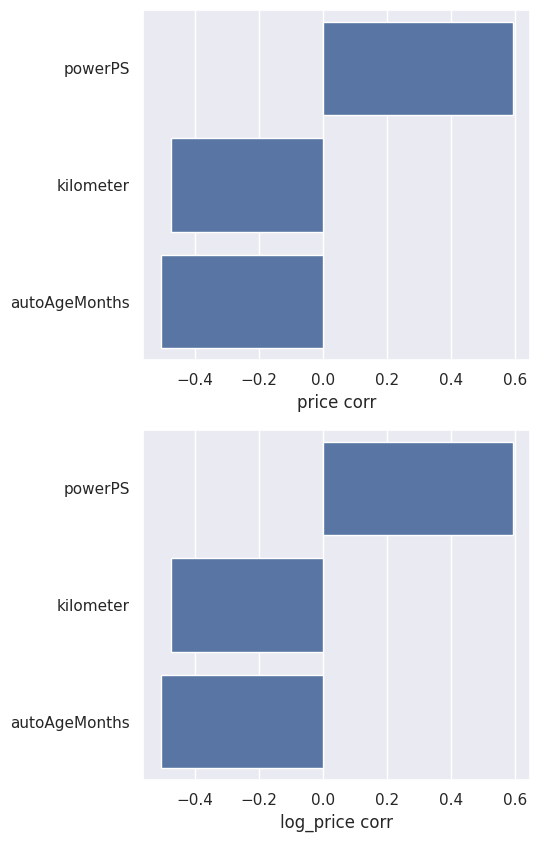

In [34]:
fig, axes = plt.subplots(len(targets), 1, figsize = (5, 5 * len(targets)))

for i in range(len(targets)):
    correlations = df[numeric].corrwith(df["price"]).sort_values(ascending=False)
    sns.barplot(y=correlations.index, x=correlations, ax=axes[i])
    axes[i].set(xlabel=f"{targets[i]} corr", ylabel="")

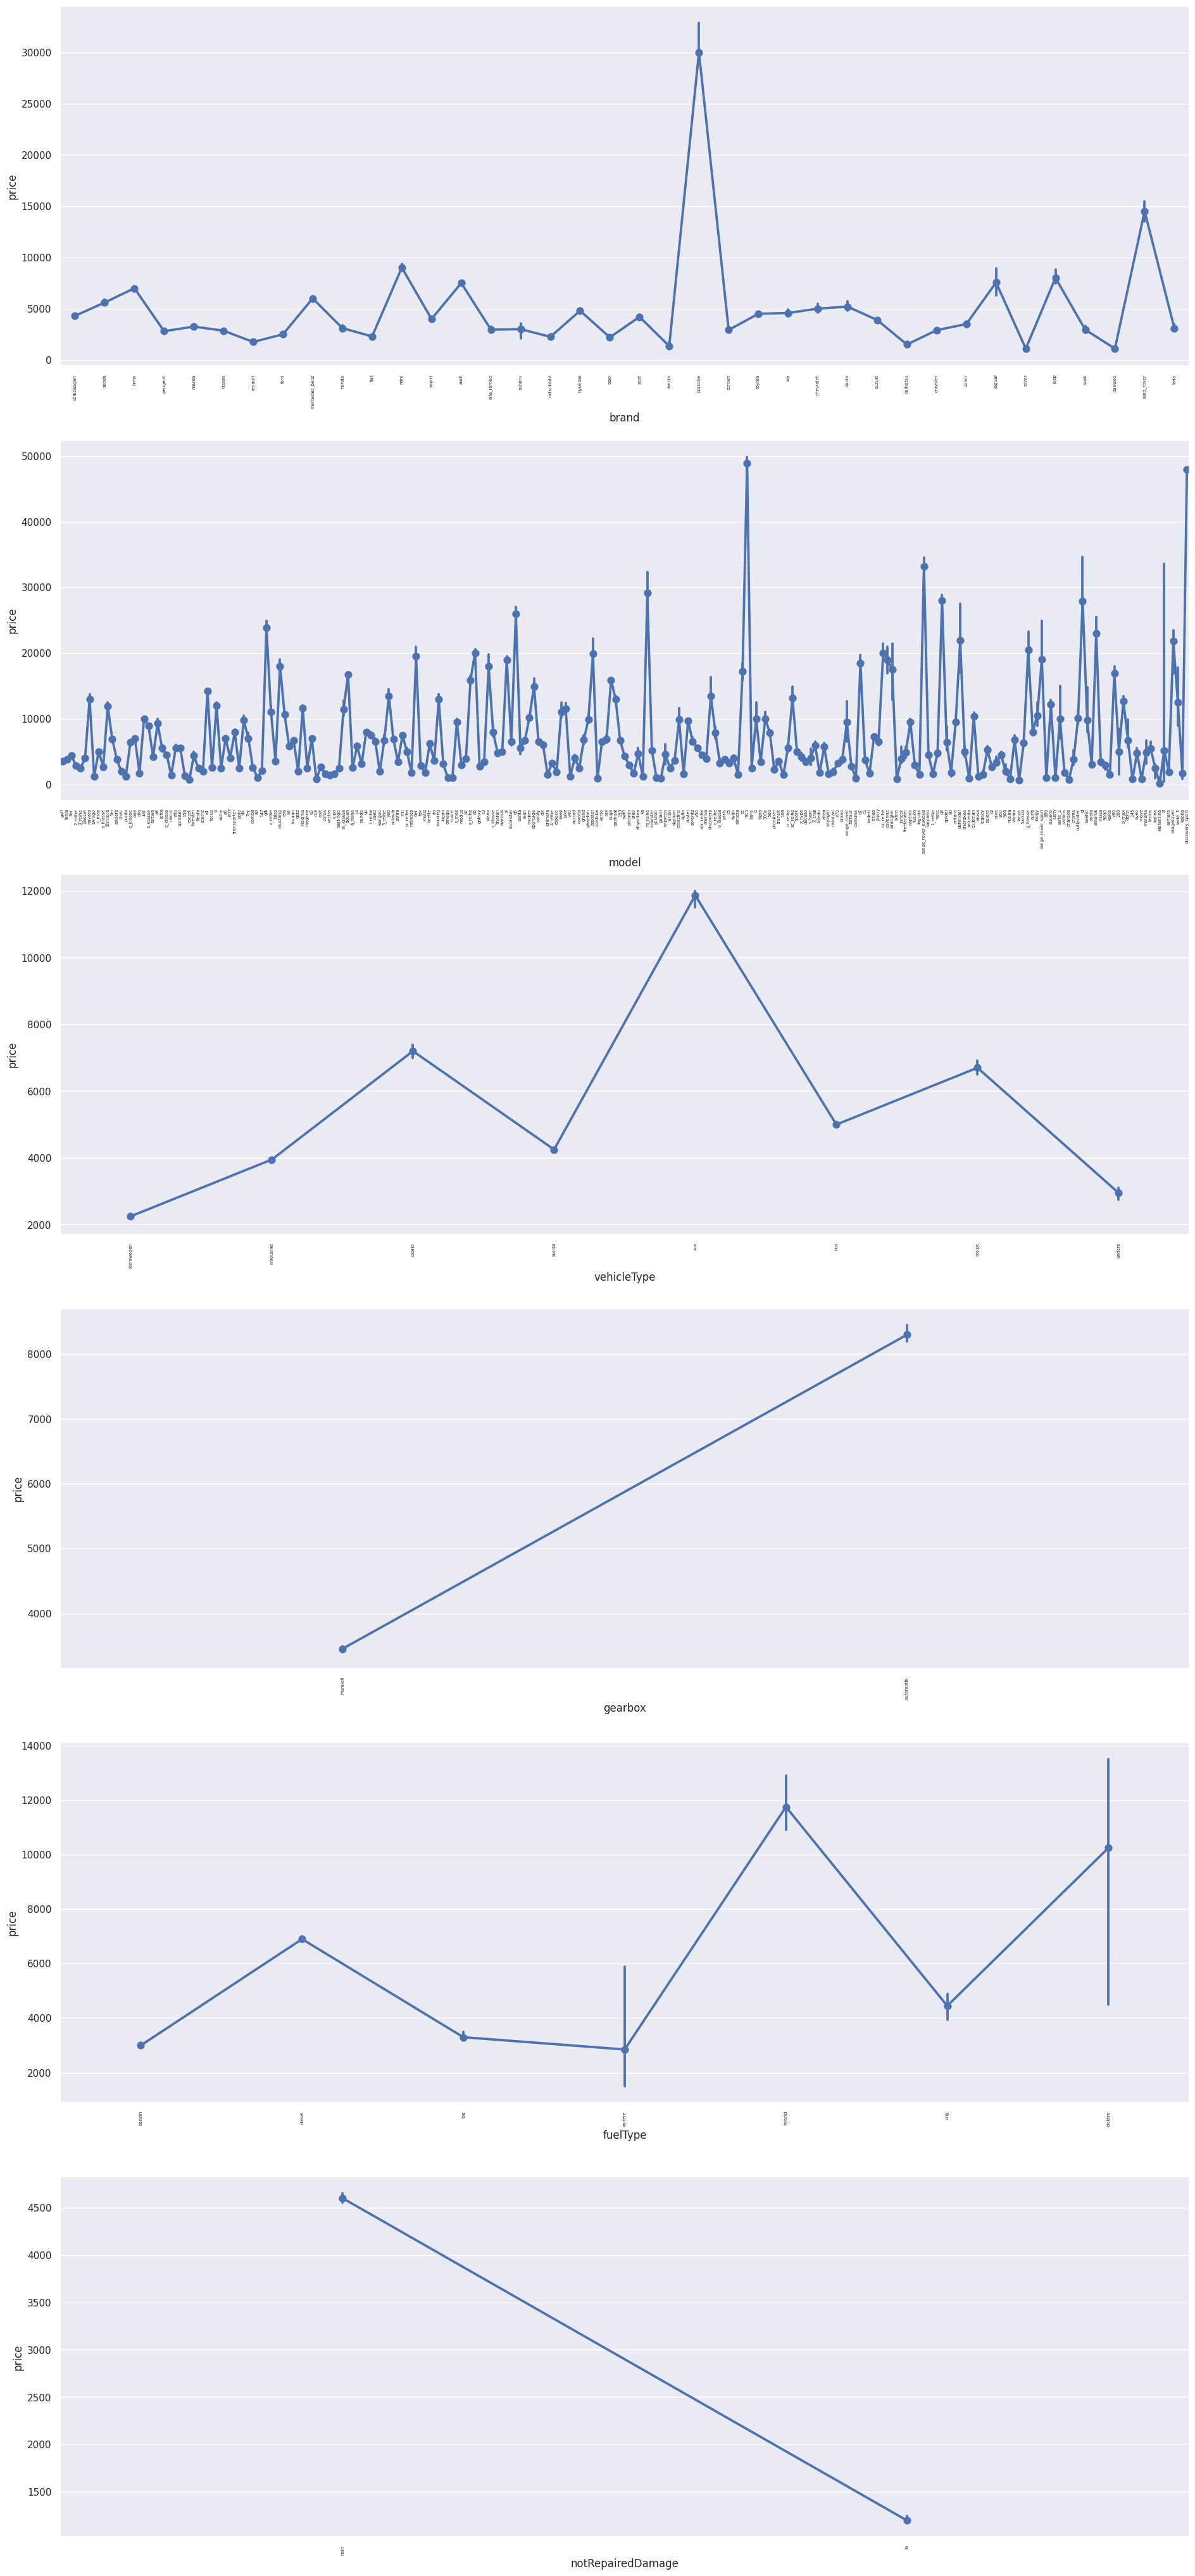

In [35]:
fig, axes = plt.subplots(len(categorical), 1, figsize = (20, 7 * len(categorical)))
fig.tight_layout(pad=5.0)

for i, categ in enumerate(categorical):
    sns.pointplot(x=categ, y='price', data=df, ax=axes[i], estimator="median")
    axes[i].tick_params(axis='x', labelrotation=90, labelsize=5)

In [36]:
car_full_name = df.groupby(by=[df.brand, df.model]).size().to_frame()

In [37]:
car_full_name.shape

(295, 1)

In [38]:
print(len(df["brand"].unique()), len(df["model"].unique()), len(df["brand"].unique()) * len(df["model"].unique()))

38 249 9462


In [39]:
df["car_full_name"] = df["brand"] + "_" + df["model"]

In [40]:
categorical.append("car_full_name")

Remove outliers

In [41]:
df = df.loc[(df["log_price"] > 5)]

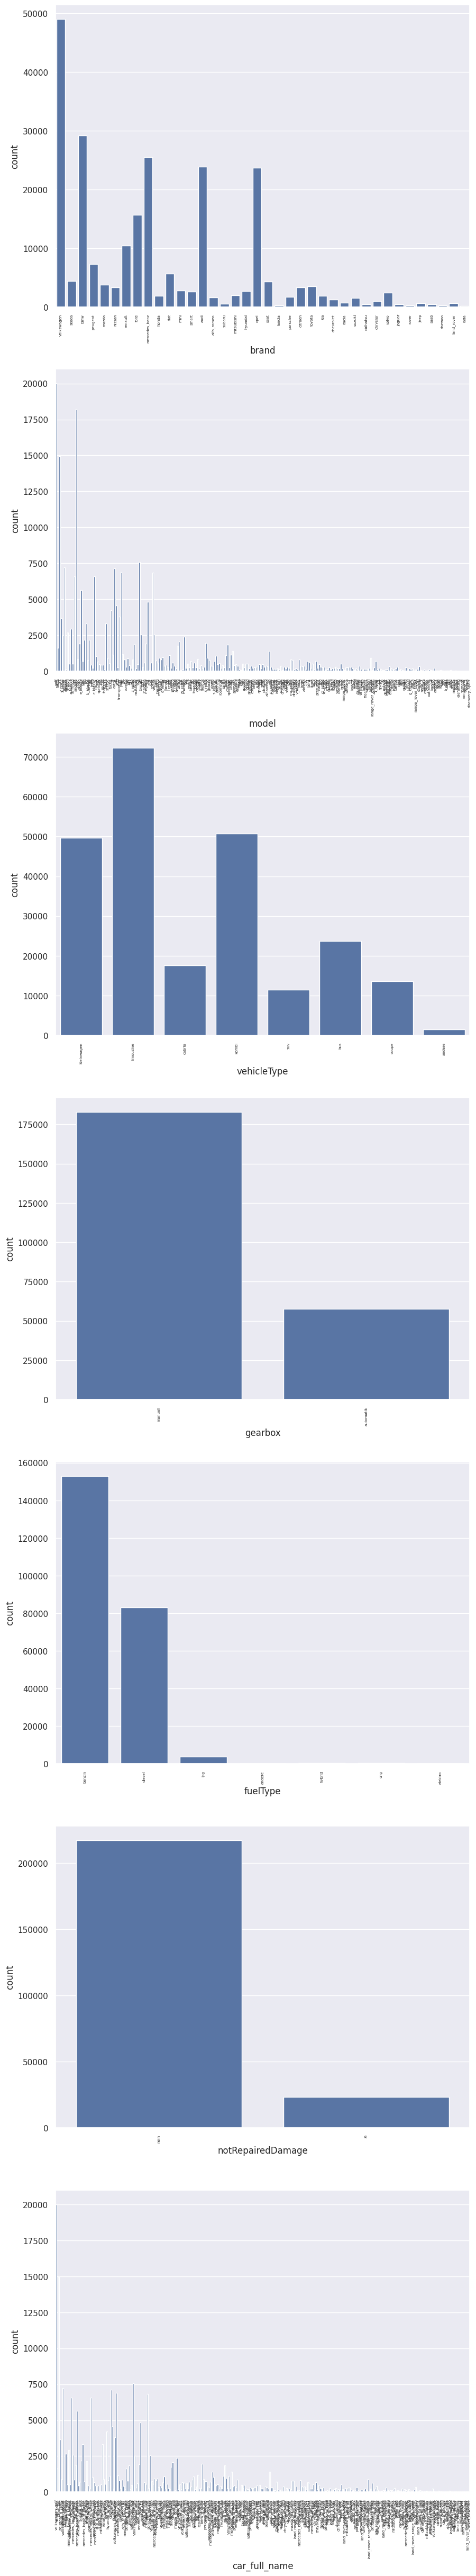

In [42]:
fig, axes = plt.subplots(len(categorical), 1, figsize = (10, 7 * len(categorical)))
fig.tight_layout(pad=5.0)

for i, categ in enumerate(categorical):
    sns.countplot(x=categ, data=df, ax=axes[i])
    axes[i].tick_params(axis='x', labelrotation=90, labelsize=5)

In [43]:
categorical

['brand',
 'model',
 'vehicleType',
 'gearbox',
 'fuelType',
 'notRepairedDamage',
 'car_full_name']

In [44]:
categorical = categorical[2:]

In [45]:
df.loc[:, 'bias'] = 1
other = ['bias']

In [46]:
x = df[categorical + numeric + other]
y = df['log_price'].values

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [48]:
random_state = 981498

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=random_state)

In [50]:
X_train.shape, X_val.shape, X_test.shape

((192328, 316), (24041, 316), (24042, 316))

In [51]:
y_train.shape, y_val.shape, y_test.shape

((192328,), (24041,), (24042,))

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

In [89]:
from linear_regression import LinearRegression

lambdas = np.logspace(-7, 1, 20)

descent_config = {
    'descent_name': '',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0.01
    }
}

descents = {
    'full': {
        "train_rmse": [],
        "val_rmse": [],
        "test_rmse": [],
        "r2_train": [],
        "r2_test": [],
        "iter_num": [],
        "best_lambda" : 0.01,
        "loss_history" : None
    },
    'stochastic': {
        "train_rmse": [],
        "val_rmse": [],
        "test_rmse": [],
        "r2_train": [],
        "r2_test": [],
        "iter_num": [],
        "best_lambda" : 0.01,
        "loss_history" : None
    },
    'momentum': {
        "train_rmse": [],
        "val_rmse": [],
        "test_rmse": [],
        "r2_train": [],
        "r2_test": [],
        "iter_num": [],
        "best_lambda" : 0.01,
        "loss_history" : None
    },
    'adam': {
        "train_rmse": [],
        "val_rmse": [],
        "test_rmse": [],
        "r2_train": [],
        "r2_test": [],
        "iter_num": [],
        "best_lambda" : 0.01,
        "loss_history" : None
    }
}

for descent_name in tqdm(descents.keys()):
    descent_config['descent_name'] = descent_name

    for l in lambdas:
        descent_config['kwargs']['lambda_'] = l

        model = LinearRegression(descent_config=descent_config)
        # model.fit(X_train, y_train)
        model.fit(X_val, y_val)

        y_train_pred = model.predict(X_train)
        descents[descent_name]["train_rmse"].append(mean_squared_error(y_train, y_train_pred, squared=False))

        y_val_pred = model.predict(X_val)
        descents[descent_name]["val_rmse"].append(mean_squared_error(y_val, y_val_pred, squared=False))

        y_test_pred = model.predict(X_test)
        descents[descent_name]["test_rmse"].append(mean_squared_error(y_test, y_test_pred, squared=False))

        descents[descent_name]["iter_num"].append(len(model.loss_history) - 1)

        descents[descent_name]["r2_train"].append(r2_score(y_train, y_train_pred))
        descents[descent_name]["r2_test"].append(r2_score(y_test, y_test_pred))
    
    descents[descent_name]["best_lambda"] = lambdas[np.argmin(descents[descent_name]["val_rmse"])]
    descents[descent_name]["loss_history"] = model.loss_history

  0%|          | 0/4 [00:00<?, ?it/s]

/home/maxim-andronov/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/maxim-andronov/a_ml/ml-course-hse/2022-fall/homeworks-practice/homework-practice-03-gd/descents.py:77: RuntimeWarning: overflow encountered in square
  return np.mean((x @ self.w - y)**2)
/home/maxim-andronov/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/maxim-andronov/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/maxim-andronov/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:478: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_

In [90]:
metrics = ["train_rmse", "val_rmse", "test_rmse", "r2_train", "r2_test", "iter_num"]

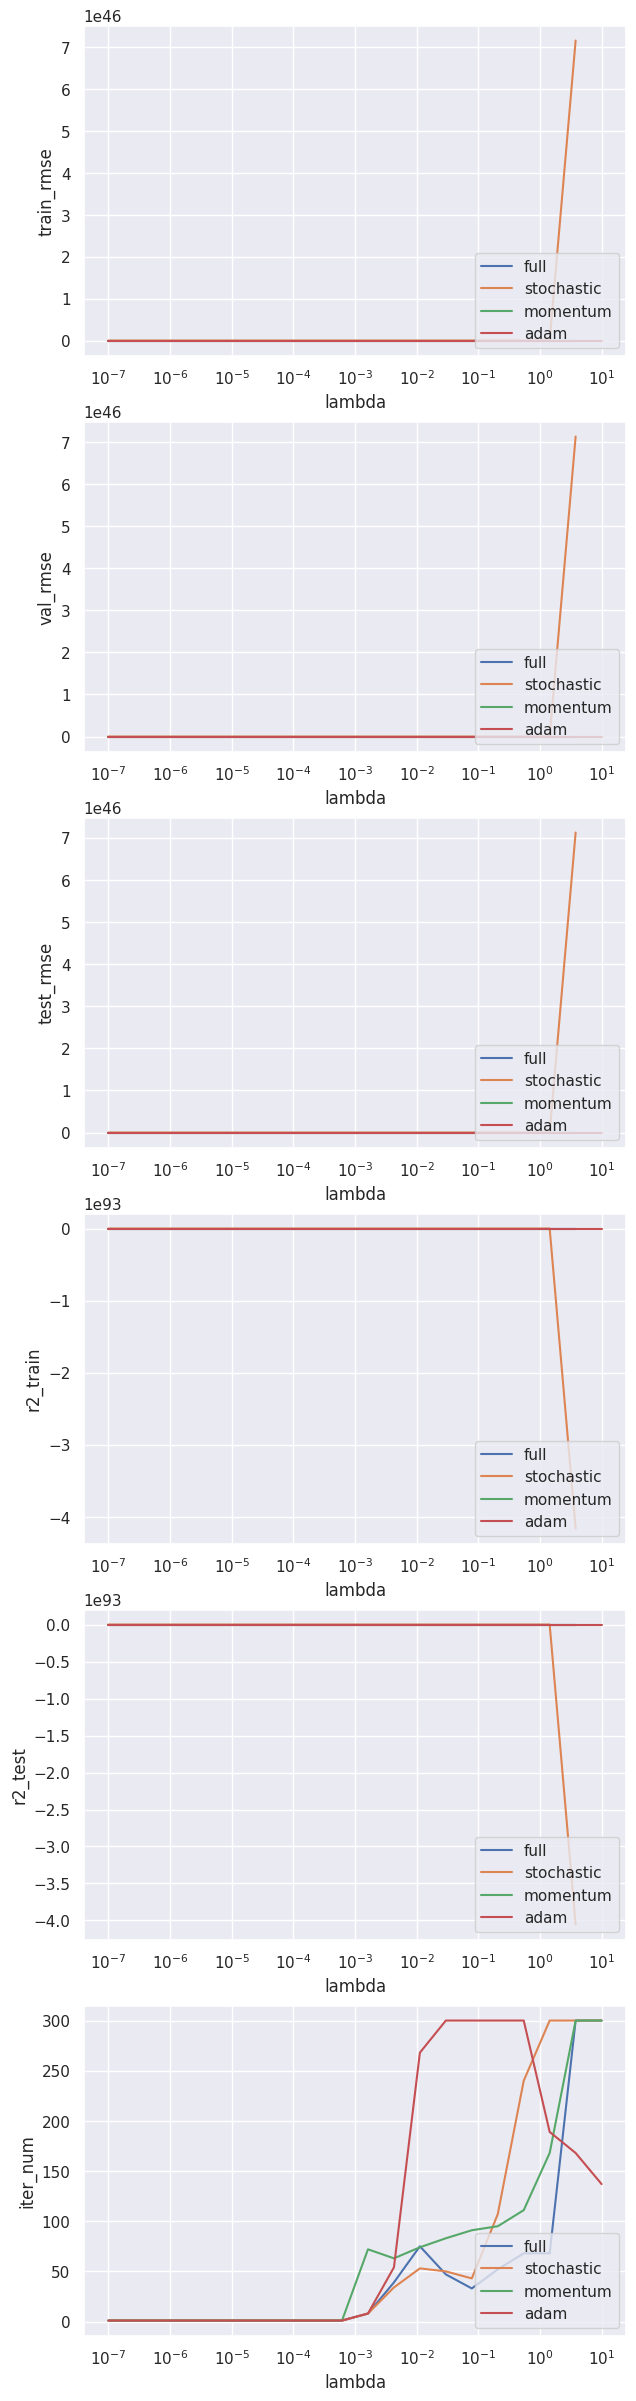

In [91]:
fig, axes = plt.subplots(len(metrics), 1, figsize = (7, 5 * len(metrics)))

for i, m in enumerate(metrics):
    for k, v in descents.items():
        axes[i].plot(lambdas, v[m], label=k)
        axes[i].set(xlabel="lambda", ylabel=m, xscale="log")
    axes[i].legend(loc='lower right')

In [92]:
for k, v in descents.items():
    best_lambda = v["best_lambda"]
    print(f"[{k}] best_lambda = {best_lambda:.10f}")

[full] best_lambda = 1.4384498883
[stochastic] best_lambda = 0.5455594781
[momentum] best_lambda = 1.4384498883
[adam] best_lambda = 3.7926901907


In [93]:
for k, v in descents.items():
    print(v["r2_train"])

[-24.959841369275786, -23.00647739805899, -20.881438373776692, -20.775814800817976, -26.19473773580217, -28.840486382835106, -31.46039242597186, -28.524351544550754, -23.199596657799, -25.600738646774214, -21.6985434685712, -14.343526769574538, -4.246477945550523, -0.29009911711496694, 0.08805666259473977, 0.2677541302404739, 0.5983817215167271, 0.7054851161337137, -4.702144826031507e+66, -inf]
[-32.847147255412565, -21.13879181685054, -28.517145770007623, -24.151084270678233, -28.13173638288362, -28.53407411076181, -37.170185471222844, -27.02704102786798, -18.640257851893715, -21.456380601208362, -19.43374200538976, -14.109285701533206, -4.445198869639112, -0.6539968046330111, -0.003431086411223916, 0.3759499267746482, 0.644944572471376, -1845233540.1245153, -4.1618199269961736e+93, -inf]
[-21.125865701101617, -26.049587183377856, -16.41552507727203, -23.307865718378498, -29.21053074515584, -26.560861593408344, -31.64657911031143, -17.159320857204584, -28.800026956693536, -32.43508018

In [56]:
# YOUR CODE:

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [57]:
# YOUR CODE:

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [58]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [59]:
# YOUR CODE:

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [60]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [61]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [62]:
# YOUR CODE: